In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#DataFrame형태로 성적데이터 만들기
#시간,성적
x=[9,8,4,2]
y=[90,80,40,20]
con={"시간":x,"성적":y}
data=pd.DataFrame(data)
#pd.DataFrame([9,90],[8,80],[4,40],[2,20],columns=['시간','성적'])

### 수학 공식을 이용한 해석적 방법
- LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
linear_model=LinearRegression()
linear_model.fit(data[['시간']],data['성적'])
#수학공식 쓰므로 추가로 지정할 매개변수가 없다
#복잡도를 제어할 방법이 없어 사용하긴 쉽지만 과대적합 되기 쉽다.
#시간은 2차원으로 넣어줘야 한다. 보통 x데이터는 컬럼이 하나인 경우가 드물다 그래서 2차원으로

LinearRegression()

In [7]:
data[['시간']]#데이터프레임형태

,시간
0,9
1,8
2,4
3,2


In [8]:
data['성적']#시리즈형태

0    90
1    80
2    40
3    20
Name: 성적, dtype: int64

In [9]:
#가중치
print(linear_model.coef_)
#절편
print(linear_model.intercept_)

[10.]
-7.105427357601002e-15


In [11]:
#예측
linear_model.predict([[7]])

array([70.])

### H(x)=w*x+b

In [12]:
def h(w,x,b):
    return w*x+b

### 비용함수
- 평균제곱오차(MSE)

In [13]:
def cost(data,target,weight,intercept):#MSE
    y_pre=h(weight,data,intercept)     #예측값
    return ((y_pre-target)**2).mean() #평균제곱오차(MSE)

In [14]:
#기울기 10,절편0
cost(data['시간'],data['성적'],10,0)

0.0

In [15]:
#기울기 12,절편5
cost(data['시간'],data['성적'],12,5)

305.0

In [16]:
cost(data['시간'],data['성적'],11,2)

68.25

## 경사하강법

In [17]:
weight_arr=range(-10,31)
weight_arr

range(-10, 31)

In [18]:
cost_list=[]
for w in weight_arr:
    c=cost(data['시간'],data['성적'],w,0)
    cost_list.append(c)
cost_list

[16500.0,
 14891.25,
 13365.0,
 11921.25,
 10560.0,
 9281.25,
 8085.0,
 6971.25,
 5940.0,
 4991.25,
 4125.0,
 3341.25,
 2640.0,
 2021.25,
 1485.0,
 1031.25,
 660.0,
 371.25,
 165.0,
 41.25,
 0.0,
 41.25,
 165.0,
 371.25,
 660.0,
 1031.25,
 1485.0,
 2021.25,
 2640.0,
 3341.25,
 4125.0,
 4991.25,
 5940.0,
 6971.25,
 8085.0,
 9281.25,
 10560.0,
 11921.25,
 13365.0,
 14891.25,
 16500.0]

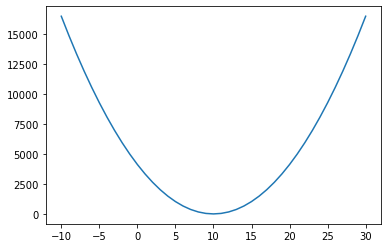

In [23]:
plt.plot(weight_arr,cost_list)
plt.show()

### 경사하강법
- SGDRegressor 사용하기

In [24]:
from sklearn.linear_model import SGDRegressor

In [36]:
sgd_model=SGDRegressor(max_iter=5000,#가중치 업데이트 반복 횟수
                      eta0=0.05, #학습률(learning rate)
                      verbose=1) #학습과정을 확인 할 수 있다.
                      

In [37]:
sgd_model.fit(data[['시간']],data['성적'])

-- Epoch 1
Norm: 2.90, NNZs: 1, Bias: 1.908058, T: 4, Avg. loss: 353.403888
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 3.89, NNZs: 1, Bias: 2.810875, T: 8, Avg. loss: 1991.010539
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.87, NNZs: 1, Bias: 3.724541, T: 12, Avg. loss: 178.628941
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 8.05, NNZs: 1, Bias: 3.879917, T: 16, Avg. loss: 163.240233
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 9.04, NNZs: 1, Bias: 4.065688, T: 20, Avg. loss: 13.997538
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 9.03, NNZs: 1, Bias: 4.000354, T: 24, Avg. loss: 5.546528
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 9.42, NNZs: 1, Bias: 4.021022, T: 28, Avg. loss: 3.170218
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 9.18, NNZs: 1, Bias: 3.928909, T: 32, Avg. loss: 1.593970
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.50, NNZs: 1, Bias: 3.933081, T: 36, Avg. loss: 2.372772
Total training time: 0.00 seconds.
--

SGDRegressor(eta0=0.05, max_iter=5000, verbose=1)

In [38]:
sgd_model.predict([[7]])

array([70.09066216])

In [39]:
print(sgd_model.coef_)
print(sgd_model.intercept_)

[9.92903128]
[0.58744321]
